# Analisa Data Tinggi Permukaan Air DKI Jakarta 2009 - 2014
Suisbiyanto Prasetya


Data berikut ini merupakan hasil pencatatan ketinggian permukaan Air pada pintu-pintu air di Jakarta tahun 2009-2014. Untuk Kondisi Aman permukaan Air yaitu antara -180 cm hingga 50 cm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_air = pd.read_csv('tinggi-permukaan-air-pintu-air.csv', delimiter = ',', encoding = "ISO-8859-1")
data_air.sample(20)
# data_air

,nama_pintu_air,tanggal,jam,tinggi_air,keterangan_cuaca,status
141769,Katulampa,2011-01-07,20:00:00,30.0,MT,Normal
159862,Krukut Hulu,2012-04-01,06:00:00,40.0,T,Normal
198088,Manggarai,2011-03-11,23:00:00,700.0,T,Normal
156086,Krukut Hulu,2012-09-08,12:00:00,30.0,T,Normal
32838,Cipinang Hulu,2013-08-04,18:00:00,80.0,T,Normal
199564,Manggarai,2011-01-09,05:00:00,680.0,MT,Normal
227871,Pasar Ikan,2011-01-30,18:00:00,115.0,M,Normal
137353,Katulampa,2011-07-09,21:00:00,NaN,T,Normal
210549,Pasar Ikan,2013-01-27,24:00:00,150.0,M,Normal
243092,Pesanggrahan,2012-08-24,12:00:00,55.0,T,Normal


###### T : Terang, MT : Mendung Tipis, M : Mendung, G : Derimis, H : Hujan


sumber data : https://data.go.id/dataset/laporan-tinggi-air-dki-jakarta

In [3]:
data_air.columns
# data_air[['nama_pintu_air','keterangan_cuaca','status']]

Index([u'nama_pintu_air', u'tanggal', u'jam', u'tinggi_air',
       u'keterangan_cuaca', u'status'],
      dtype='object')

In [2]:
# Tinggi Air Rata-rata di setiap pintu air
print "Tinggi Air 2009 - 2014 (cm):"
ax = data_air.groupby('nama_pintu_air').tinggi_air.agg(['mean', 'min', 'max'])
print (ax)

Tinggi Air 2009 - 2014 (cm):
                      mean     min     max
nama_pintu_air                            
Angke Hulu       61.964708  -175.0   550.0
Cipinang Hulu    81.985061     5.0   440.0
Depok           101.812807     8.0   730.0
Karet           402.272633  -180.0   760.0
Katulampa        25.961942     1.0   670.0
Krukut Hulu      62.097338  -180.0   765.0
Manggarai       684.467012  -160.0  7110.0
Pasar Ikan      164.146744  -190.0  2010.0
Pesanggrahan     72.235394    10.0   710.0
Pulo Gadung     369.583287    10.0   980.0
Sunter Hulu      53.091201     2.0   500.0
Sunter Selatan   91.494757   -66.0  8100.0
Sunter Utara     38.161580  -180.0  1001.0
Waduk Pluit    -151.954952 -1808.0   430.0


In [3]:
bx = data_air.groupby('nama_pintu_air').median()
print "Median Tinggi Air 2009 - 2014 (cm):"
print (bx)

Median Tinggi Air 2009 - 2014 (cm):
                tinggi_air
nama_pintu_air            
Angke Hulu            40.0
Cipinang Hulu         80.0
Depok                100.0
Karet                400.0
Katulampa             20.0
Krukut Hulu           60.0
Manggarai            680.0
Pasar Ikan           164.0
Pesanggrahan          70.0
Pulo Gadung          360.0
Sunter Hulu           50.0
Sunter Selatan        97.0
Sunter Utara          35.0
Waduk Pluit         -160.0


In [17]:
# cx = data_air[['nama_pintu_air', 'tinggi_air','status']]
# print (cx)

In [4]:
data_air.sort_values(by = "nama_pintu_air")
print "Ketinggian rata-rata, minimum, dan maksimum pada kondisi Kritis, Normal, Rawan, Waspada (cm):"
data_air.groupby(['nama_pintu_air', 'status']).tinggi_air.agg(['mean', 'min', 'max'])

Ketinggian rata-rata, minimum, dan maksimum pada kondisi Kritis, Normal, Rawan, Waspada (cm):


mean     min     max
nama_pintu_air status                              
Angke Hulu     Kritis    424.545455   375.0   550.0
               Normal     46.133714  -175.0    95.0
               Rawan     245.778824   200.0   345.0
               Waspada   134.169045   100.0   200.0
Cipinang Hulu  Kritis    413.333333   400.0   440.0
               Normal     81.848932     5.0   145.0
               Waspada   168.382353   150.0   195.0
Depok          Kritis    544.761905   360.0   730.0
               Normal    100.100024     8.0   195.0
               Rawan     291.714286   270.0   345.0
               Waspada   220.892193   200.0   265.0
Karet          Kritis    658.367347   610.0   760.0
               Normal    396.179398  -180.0   445.0
               Rawan     562.905983   550.0   600.0
               Waspada   472.309132    45.0   550.0
Katulampa      Kritis    451.666667   220.0   670.0
               Normal     24.231992     1.0    75.0
               Rawan     163.076923   150.0   180.0
               Waspada    92.986056    80.0   140.0
Krukut Hulu    Kritis    524.250000   390.0   765.0
               Normal     61.097954  -180.0   145.0
               Waspada   162.021645   150.0   195.0
Manggarai      Kritis   1859.750000   960.0  7110.0
               Normal    679.820623  -160.0   745.0
               Rawan     899.219388   850.0   945.0
               Waspada   776.095380   750.0   850.0
Pasar Ikan     Kritis    419.047619   231.0  2010.0
               Normal    146.847883  -190.0   169.0
               Rawan     199.408479   190.0   229.0
               Waspada   177.909756   170.0   189.0
Pesanggrahan   Kritis    577.272727   360.0   710.0
               Normal     70.746936    10.0   145.0
               Rawan     282.066667   250.0   320.0
               Waspada   177.563863   150.0   245.0
Pulo Gadung    Kritis    976.000000   970.0   980.0
               Normal    368.362329    10.0   545.0
               Rawan     721.875000   700.0   740.0
               Waspada   583.423358   550.0   685.0
Sunter Hulu    Kritis    386.666667   360.0   500.0
               Normal     52.414995     2.0   135.0
               Rawan     200.000000   200.0   200.0
               Waspada   154.803922   140.0   180.0
Sunter Selatan Kritis    418.377049   221.0  8100.0
               Normal     82.847391   -66.0    99.0
               Rawan     175.947059   150.0   218.0
               Waspada   104.653470   100.0   149.0
Sunter Utara   Kritis    204.239437   153.0  1001.0
               Normal     36.250559  -180.0    79.0
               Rawan     133.267857   120.0   148.0
               Waspada    85.779570    80.0   118.0
Waduk Pluit    Kritis     63.210526  -190.0   430.0
               Normal   -159.402724 -1808.0  -105.0
               Rawan     -39.405253   -60.0   -11.0
               Waspada   -86.974975  -100.0   -15.0

Dari tabel  tersebut terlihat standar status ketinggian air untuk masing-masing pintu air berbeda-beda sebagai contoh:
#### Waduk Pluit
- Normal antara -1808 sampai -105 cm
- Waspada antara -100 sampai -15 cm
- Rawan antara -60 sampai -11 cm
- Kritis antara -190 sampai 430 cm

#### Cipinang Hulu
- Normal antara 5 sampai 145 cm
- Waspada 150 sampai 195 cm
- Kritis antara 400 sampai 440 cm

Waduk pluit peringatan sudah diberikan pada ketinggian air > -100 cm, sedangkan untuk Cipinang Hulu peringatan baru diberikan jika ketinggian air > 150 cm.

In [9]:
ax = data_air.groupby('nama_pintu_air').mean()['tinggi_air']
ax = ax.plot(kind='bar', title ="Tinggi air Rata-Rata di setiap Pintu Air (2009 - 2014)", legend=True, fontsize=10)
ax.set_xlabel("Pintu Air", fontsize=10)
ax.set_ylabel("Tinggi Air", fontsize=10)
plt.show()

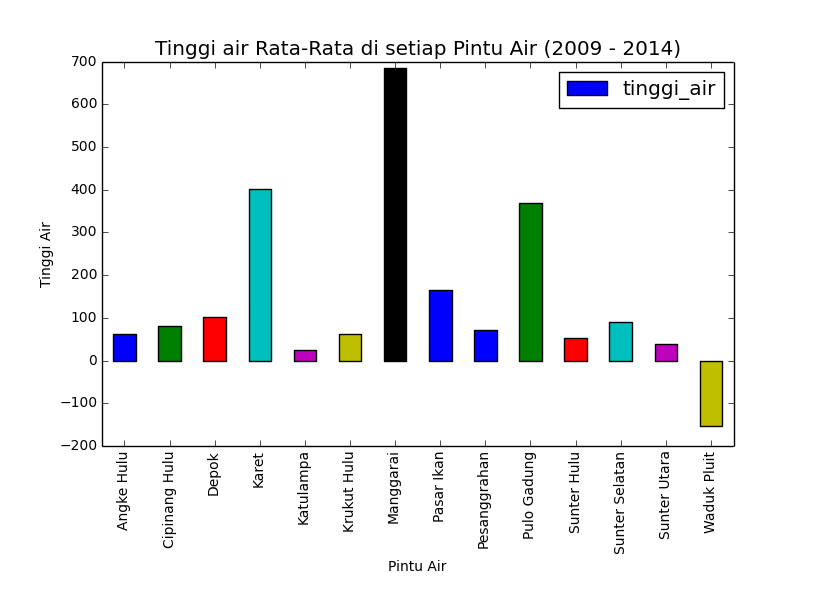

Diperoleh 5 Urutan pintu Air dengan Rata-rata tinggi air tertinggi antara lain:
1. Manggarai
2. Karet
3. Pulo Gadung
4. Pasar Ikan
5. Depok

Dengan mengetahui kondisi tersebut maka persiapan pemerintah DKI dalam mencegah banjir yaitu dapat dilakukan dengan melakukan pengerukan dasar dan pembersihan sampah di lokasi pintu-pintu air tersebut agar lebih maksimal dalam menampung AIR